In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

In [30]:
fs = 1000  # frec de muestreo
fc = 200   # frac de corte 
order = 5

#Diseño del filtro FIR pasa - bajos
fir_coeff = firwin(numtaps=M, cutoff=fc, window='hamming', fs=fs)

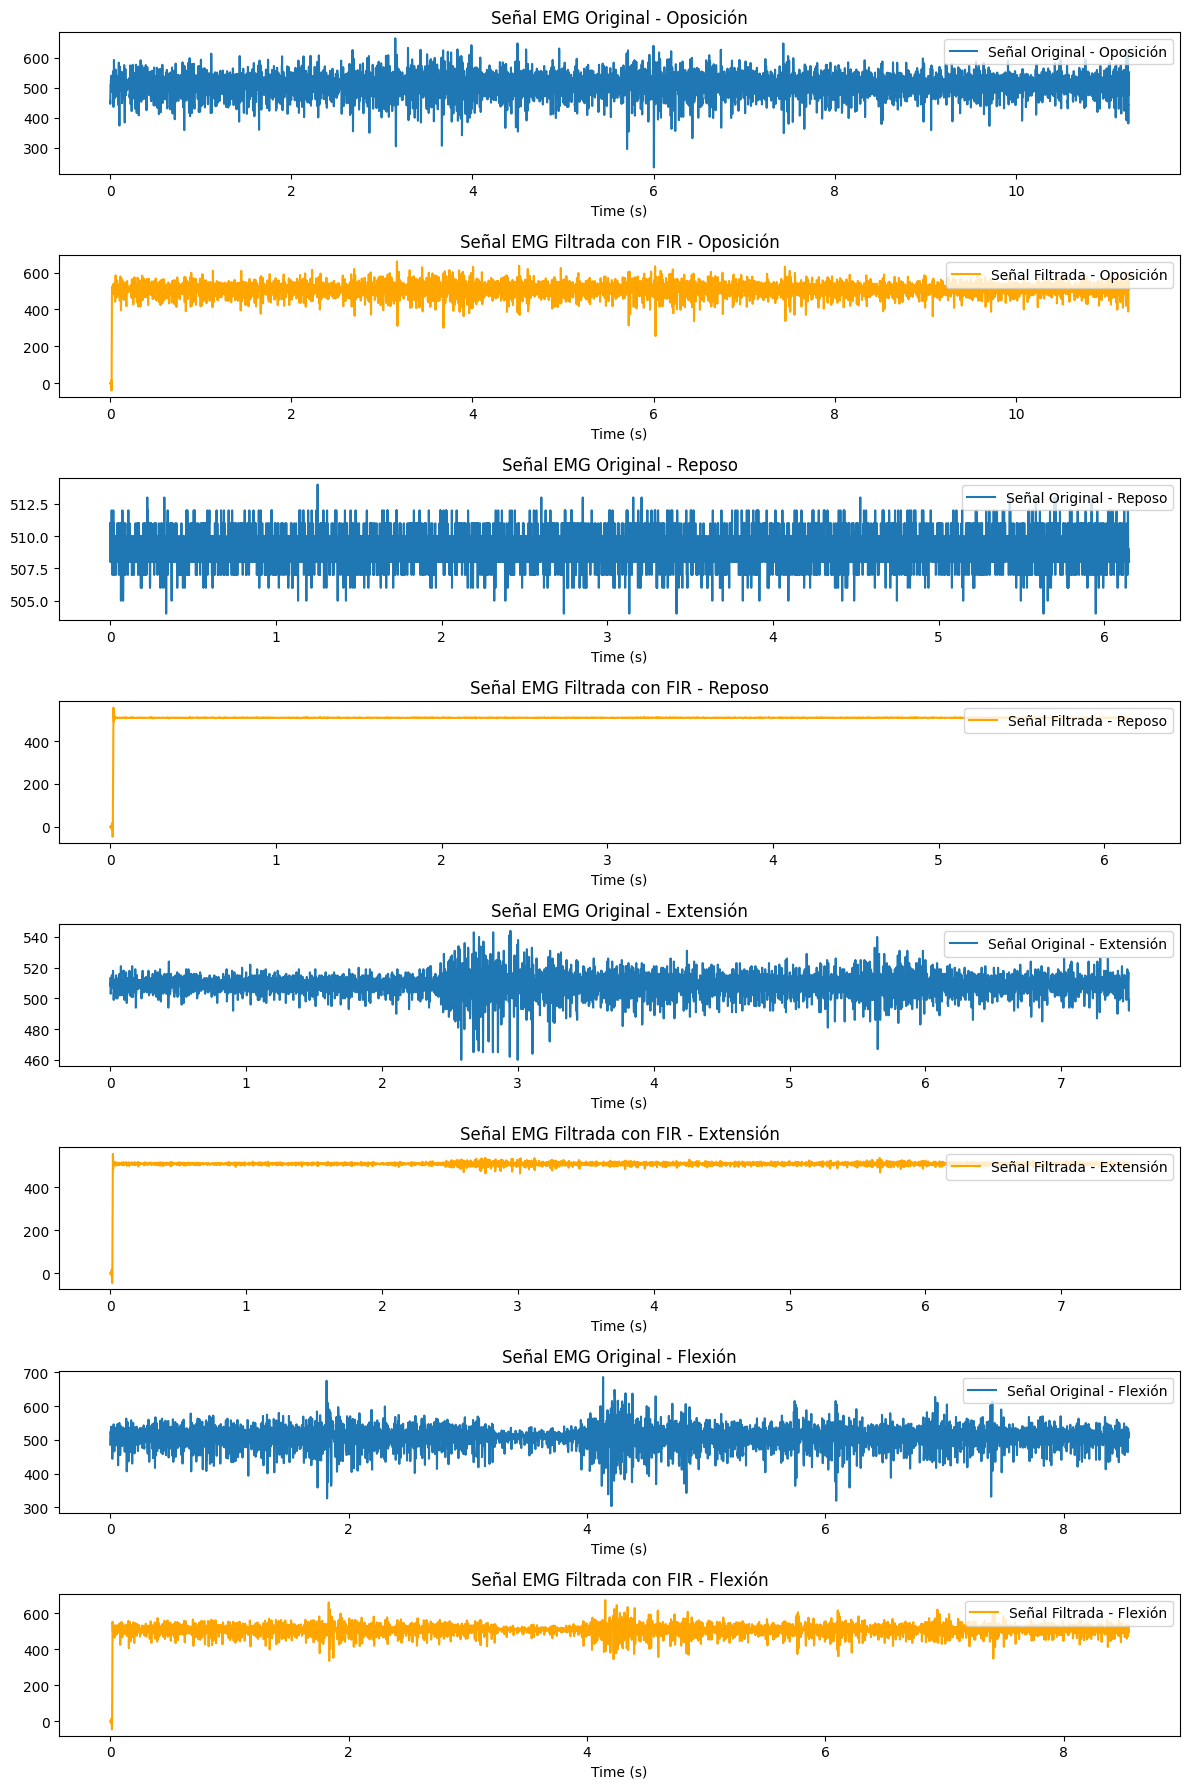

In [32]:

fig, axes = plt.subplots(8, 1, figsize=(12, 18))

files = {
    'Oposición': 'C:/Users/trabajo/Downloads/Ja_oposicion.txt',
    'Reposo': 'C:/Users/trabajo/Downloads/Ja_reposo.txt',
    'Extensión': 'C:/Users/trabajo/Downloads/Ja_extension.txt',
    'Flexión': 'C:/Users/trabajo/Downloads/Ja_flexion.txt'
}

for i, (label, file_path) in enumerate(files.items()):
    data = np.loadtxt(file_path)
    signal = data[:, 5]  
    
    # Aplicar el filtro FIR
    filtered_signal = lfilter(fir_coeff, 1, signal)
    
    # Obtener el tiempo en segundos
    time_sec = np.arange(len(signal)) / fs
    
    # Plot señal original
    ax = axes[2*i]
    ax.plot(time_sec, signal, label=f'Señal Original - {label}')
    ax.legend(loc='upper right')
    ax.set_title(f'Señal EMG Original - {label}')
    ax.set_xlabel('Time (s)')
    
    # Plot señal filtrada
    ax = axes[2*i + 1]
    ax.plot(time_sec, filtered_signal, label=f'Señal Filtrada - {label}', color='orange')
    ax.legend(loc='upper right')
    ax.set_title(f'Señal EMG Filtrada con FIR - {label}')
    ax.set_xlabel('Time (s)')
    
plt.tight_layout()
plt.show()

### Filtro IIIR

In [5]:
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt


In [26]:
fs = 1000  # frec de muestreo
fc = 200   # frac de corte 
order = 5

#Diseño del filtro FIR pasa - bajos
b, a = butter(order, fc / (fs / 2), btype='low')

In [10]:
files = {
    'Oposición': 'C:/Users/trabajo/Downloads/Ja_oposicion.txt',
    'Reposo': 'C:/Users/trabajo/Downloads/Ja_reposo.txt',
    'Extensión': 'C:/Users/trabajo/Downloads/Ja_extension.txt',
    'Flexión': 'C:/Users/trabajo/Downloads/Ja_flexion.txt'
}

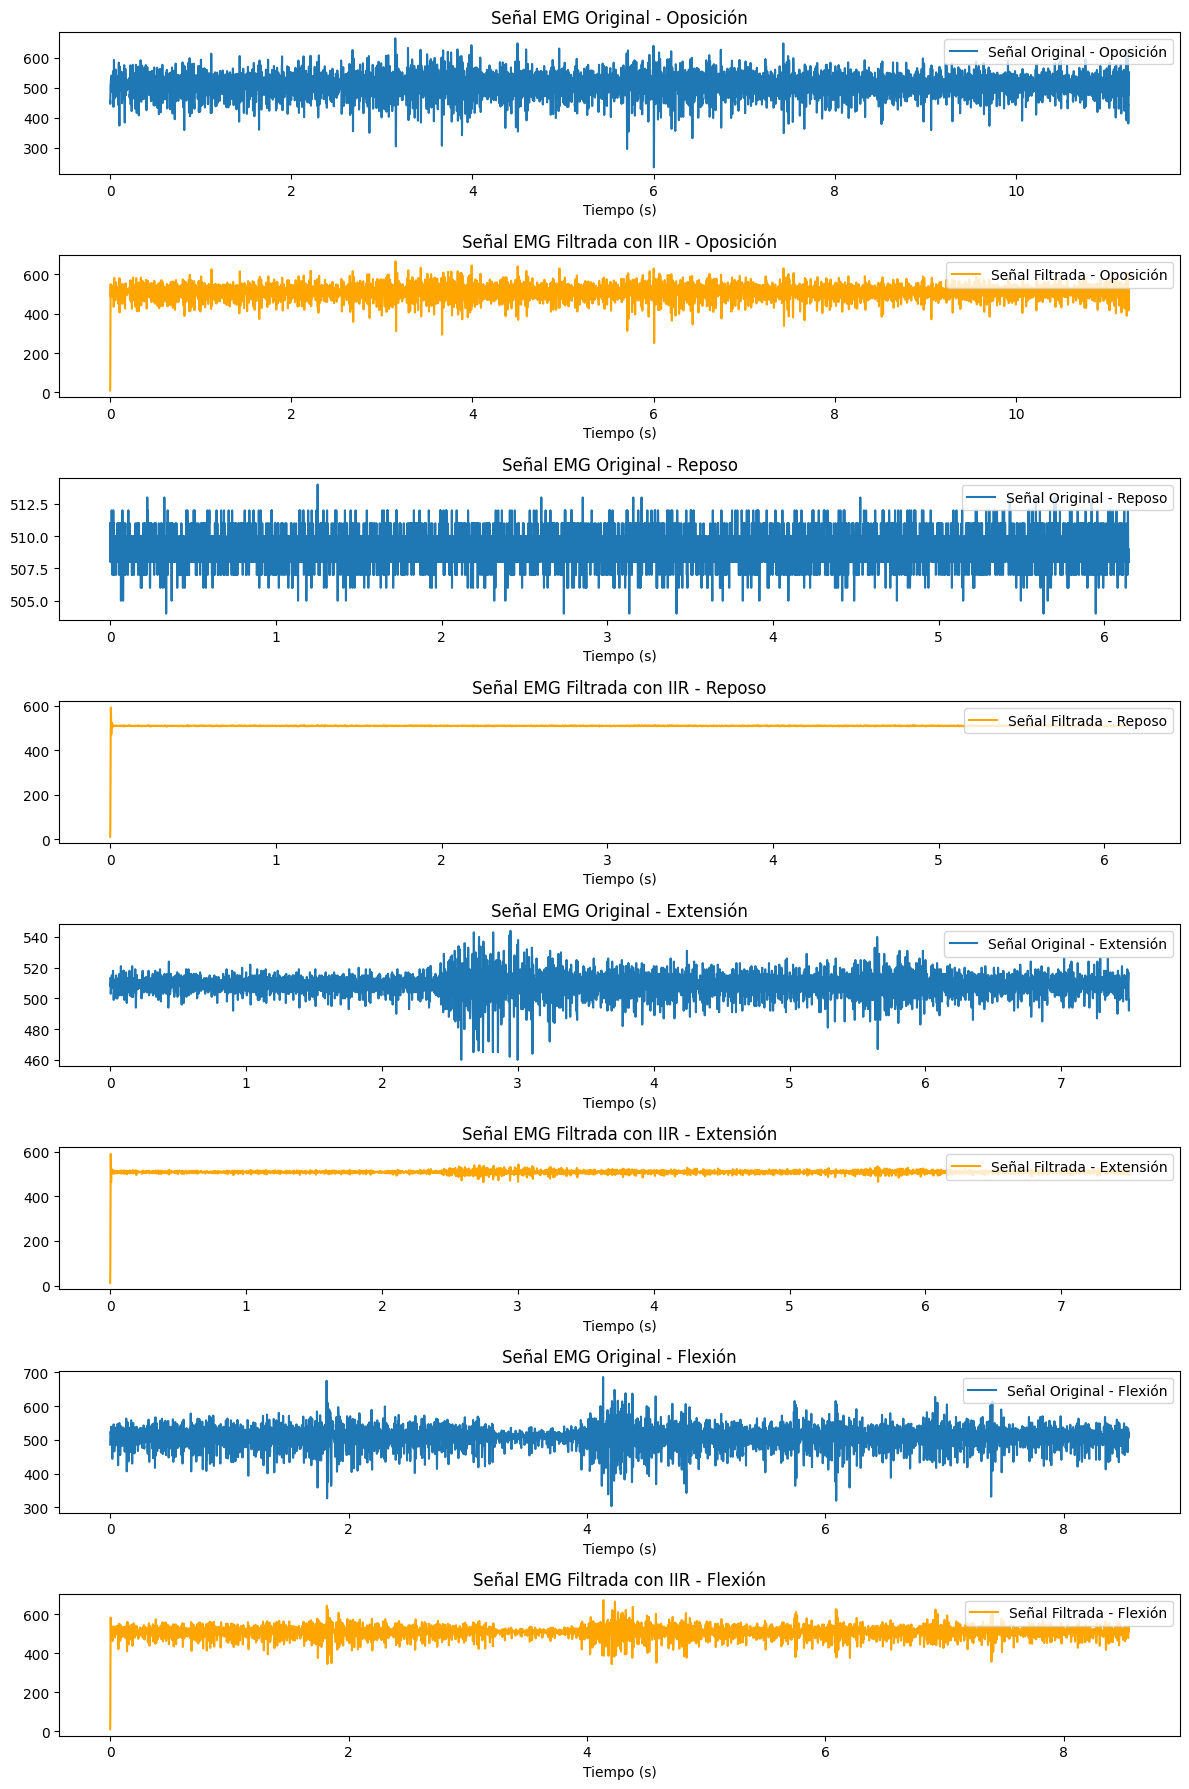

In [33]:
fig, axes = plt.subplots(8, 1, figsize=(12, 18))

for i, (label, file_path) in enumerate(files.items()):
    data = np.loadtxt(file_path)
    signal = data[:, 5]  
    
    # Aplicar el filtro IIR
    filtered_signal = lfilter(b, a, signal)
    
    # Obtener el tiempo en segundos
    time_sec = np.arange(len(signal)) / fs
    
    # Plot señal original
    ax = axes[2*i]
    ax.plot(time_sec, signal, label=f'Señal Original - {label}')
    ax.legend(loc='upper right')
    ax.set_title(f'Señal EMG Original - {label}')
    ax.set_xlabel('Tiempo (s)')
    
    # Plot señal filtrada
    ax = axes[2*i + 1]
    ax.plot(time_sec, filtered_signal, label=f'Señal Filtrada - {label}', color='orange')
    ax.legend(loc='upper right')
    ax.set_title(f'Señal EMG Filtrada con IIR - {label}')
    ax.set_xlabel('Tiempo (s)')

plt.tight_layout()
plt.show()